Семинар 3 (неделя 4): Закон больших чисел и Центральная предельная теорема
=====

# 1. Нормальное распределение и его друзья

In [90]:
# Импорт библиотек для работы со статистикой
import numpy as np
import scipy.stats as sts

# Импорт библиотек для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

# Стиль для графиков
plt.style.use('ggplot')
%matplotlib inline

Вспомним нормальное распределение и его свойства:

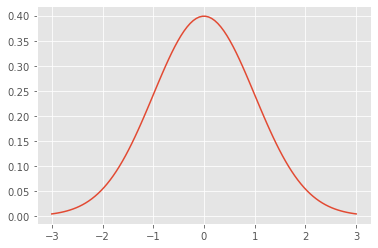

In [91]:
# Зададим диапазон значений х и число точек
а_x = np.linspace(-3,3,100)

# Создаём объект нормального распределения
rv = sts.norm(0, 1)

pdf = rv.pdf(а_x)
plt.plot(а_x, pdf);

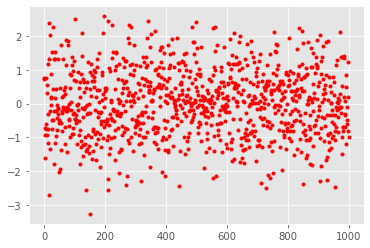

In [92]:
norm_rv = sts.norm(0, 1)
X_01 = norm_rv.rvs(1000)

plt.plot(X_01, 'r.');

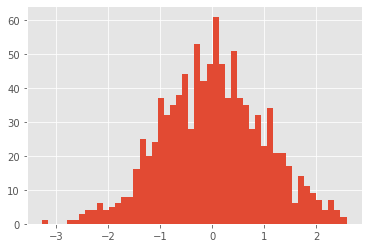

In [93]:
plt.hist(X_01, 50);

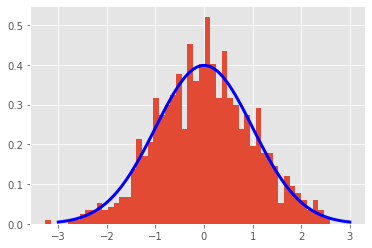

In [94]:
plt.hist(X_01, 50, density = True)
plt.plot(а_x, pdf, 'b', lw = 3);

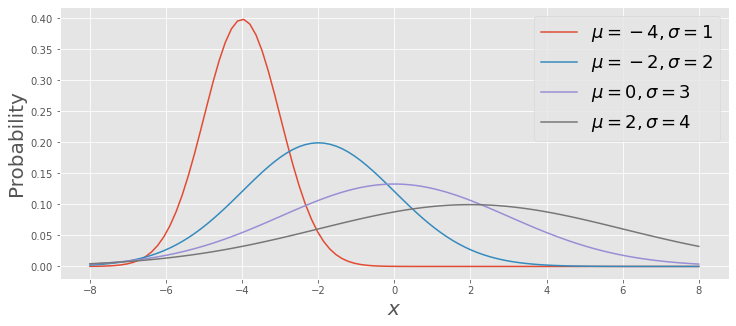

In [95]:
plt.figure(figsize=(12, 5))

x = np.linspace(-8,8,100)

par = [(-4,1),(-2,2),(0,3),(2,4)]

for mu,sigma in par:
    rv = sts.norm(mu,sigma)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$\mu={},\sigma={}$".format(mu,sigma))


plt.xlabel('$x$', fontsize=20)
plt.ylabel(r'Probability', fontsize=20)
plt.legend(fontsize = 18);

### Распределение Хи-квадрат

Пусть случайные величины $X_1, \ldots, X_k$ независимы и одинаково распределены. Причём нормально с параметрами $0$ и $1$. Обычно такой факт записывают следующим образом: 

$$
X_1, \ldots, X_k \sim iid \hspace{2mm} N(0,1).
$$ 

Буквы $iid$ расшифровываются как identically independently distributed (независимы и одинаково распределены).

__Определение:__  случайная величина $Y = X_1^2 + \ldots X_k^2$ имеет распределение хи-квадрат с $k$ степенями свободы. Кратко это записывают как $Y \sim \chi^2_k.$

Степень свободы это просто название для параметра распределения. Почему оно именно такое, мы обсудим позже. Сейчас давайте попробуем получить хи-квадрат из нормальной выборки.

In [96]:
norm_rv = sts.norm(0, 1)
X_i = norm_rv.rvs(5)
X_i

array([-0.63552087,  0.90737309,  0.36349448, -0.29060313,  1.95262051])

In [97]:
X_i = np.sum(X_i**2)
X_i

5.256517957597617

In [98]:
X_i = norm_rv.rvs(5)
X_i

array([ 0.71058505, -0.9587851 ,  1.74686704, -1.38819308, -0.25727492])

In [99]:
X_i**2

array([0.50493112, 0.91926886, 3.05154447, 1.92708002, 0.06619039])

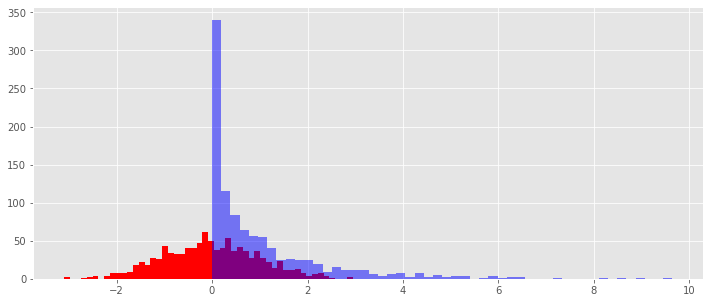

In [100]:
X_i = norm_rv.rvs(1000)
#X_j = norm_rv.rvs(1000)

plt.figure(figsize=(12, 5))
plt.hist(X_i, 50, color = 'r')
#plt.hist(X_j**2, 50, color = 'g', alpha = 0.5)
plt.hist(X_i**2, 50, color = 'b', alpha = 0.5);

In [101]:
# Несколько величин X_i
X = norm_rv.rvs(size = (3, 5)) 
X

array([[ 1.19477097,  1.49925329, -0.03002319, -0.85613879, -0.27051251],
       [-0.84550611,  0.02696842, -0.4748638 , -2.03231392,  1.58069088],
       [ 0.12449228, -0.30310842,  1.79957338, -1.32554898, -0.08288055]])

In [102]:
Y = X.sum(axis = 0)
Y

array([ 0.47375714,  1.22311329,  1.29468639, -4.21400168,  1.22729783])

<center>
<img src="array.png" width="1000"> 
</center>

In [103]:
X**2

array([[1.42747767e+00, 2.24776043e+00, 9.01391803e-04, 7.32973624e-01,
        7.31770161e-02],
       [7.14880585e-01, 7.27295809e-04, 2.25495626e-01, 4.13029986e+00,
        2.49858367e+00],
       [1.54983288e-02, 9.18747160e-02, 3.23846434e+00, 1.75708010e+00,
        6.86918564e-03]])

In [104]:
Y = (X**2).sum(axis = 0)
Y

array([2.15785658, 2.34036244, 3.46486136, 6.62035358, 2.57862987])

In [105]:
X = norm_rv.rvs(size = (3, 1000)) 
X.shape

(3, 1000)

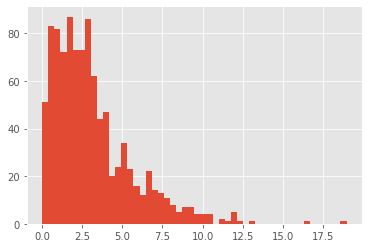

In [106]:
X = norm_rv.rvs(size = (3, 1000)) 
Y = (X**2).sum(axis = 0)
plt.hist(Y, bins = 50);

In [107]:
X = norm_rv.rvs(size = (5, 10)) 
(X**2).sum(axis = 0)

array([2.88802304, 5.94731239, 8.14940722, 8.40947783, 5.96244539,
       3.80493844, 2.4627744 , 5.96946599, 2.95826644, 6.0497279 ])

Внутри `scipy` уже есть готовая реализация $\chi^2_k$. Давайте посмотрим как плотность распределения будет выглядеть на картинке в зависимости от разных $k$. Из-за квадрата, случайная величина принимает только положительные значения. 

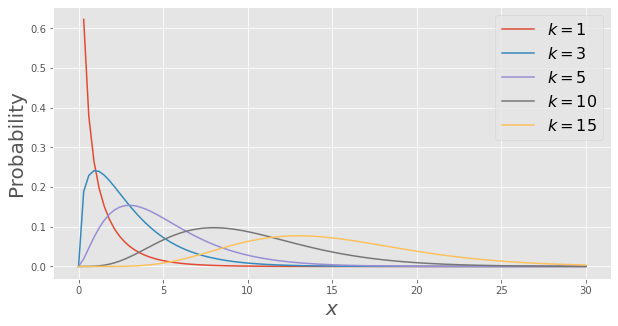

In [108]:
plt.figure(figsize=(10, 5))

x = np.linspace(0,30,100)
for k in [1, 3, 5, 10, 15]:
    rv = sts.chi2(k)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$k=%s$" % k)
plt.legend()
#plt.title("PDF ($\chi^2_k$)");

plt.xlabel('$x$', fontsize=20)
plt.ylabel(r'Probability', fontsize=20)
plt.legend(fontsize = 16);

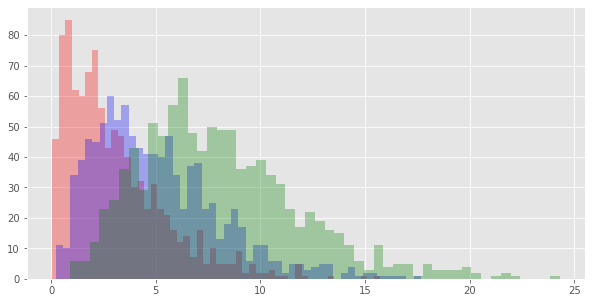

In [109]:
plt.figure(figsize=(10, 5))

X_1 = norm_rv.rvs(size = (3, 1000)) 
Y_1 = (X_1**2).sum(axis = 0)

X_2 = norm_rv.rvs(size = (5, 1000)) 
Y_2 = (X_2**2).sum(axis = 0)

plt.hist(Y_1, bins = 50, color = 'r', alpha = 0.3)
plt.hist(Y_2, bins = 50, color = 'b', alpha = 0.3)
plt.hist(Y_1 + Y_2, bins = 50, color = 'g', alpha = 0.3);

__Когда встречается на практике?__ Когда мы на первой неделе говорили про описательные статистики, мы упоминали, что выборочную дисперсию можно считать по формуле 

$$
\hat \sigma^2 = \bar{x^2} - \bar x^2.
$$

Ели выборка пришла к нам из нормального распределения, тогда $\bar{x^2}$ будет иметь $\chi^2_n$. Если немного поколдовать, можно убедиться, что для дисперсии тоже всплывает хи-квадрат распределение. В будущем мы это проделаем. 

### Распределение Стьюдента

__Определение:__ Заведём ещё одну случайную величину $X_0$ со стандартным нормальным распределением. Пусть она независима от $X_1, \ldots, X_k$. Тогда говорят, что случайная величина 

$$ Y = \frac{X_0}{\sqrt{\frac{\chi^2_k}{k}}} $$

имеет $t$-распределение стьюдента c $k-1$ степенью свободы, $Y \sim t (k-1)$. Снова попробуем получить это распределение из нормальной выборки. 

In [110]:
norm_rv = sts.norm(loc=0, scale=1)

x0 = norm_rv.rvs(1)

x = norm_rv.rvs(5)
x = np.sum(x**2)
y = x0/np.sqrt(x/5)
y

array([0.41050493])

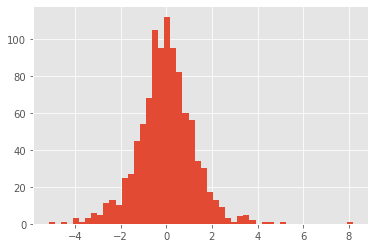

In [111]:
# хотим выборку из 1000 штук
x0 = norm_rv.rvs(1000)

x = norm_rv.rvs(size = (5, 1000)) 
x = (x**2).sum(axis=0)

y = x0/np.sqrt(x/5)

plt.hist(y, bins=50);

Снова внутри `scipy` уже есть готовая реализация $t(k)$. Давайте посмотрим как плотность распределения будет выглядеть на картинке в зависимости от разных $k$. 

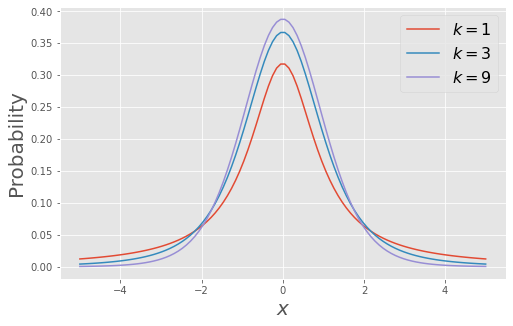

In [112]:
plt.figure(figsize=(8, 5))

x = np.linspace(-5,5,100)
for k in [1, 3, 9]:
    rv = sts.t(k)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$k=%s$" % k)
    
plt.xlabel('$x$', fontsize=20)
plt.ylabel(r'Probability', fontsize=20)

plt.legend(fontsize = 16);

Важно заметить, что при росте $k$ распределение Стьюдента становится всё больше и больше похоже на нормальное. В будущем этот факт нам пригодится. 


__Когда встречается на практике?__  Довольно часто на практике мы будем получать выражение:

$$
\frac{\bar x}{\sqrt{ \frac{\hat \sigma^2}{n}}}.
$$

Мы знаем, что по ЦПТ у числителя нормальное распределение, а в знаменателе как раз стоит  $\sqrt{\frac{\chi^2_n}{n}}$. Значит в целом выражение будет иметь распределение Стьюдента с $n-1$ степенью свободы.

Давайте нарисуем на одной картинке $N(0,1)$ и $t(1)$ распределения. 

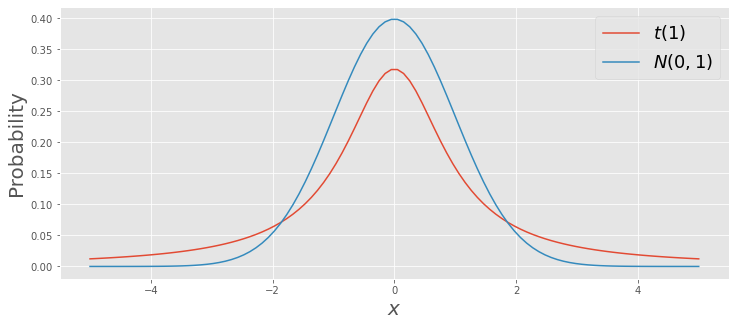

In [113]:
plt.figure(figsize=(12, 5))
x = np.linspace(-5,5,100)

plt.plot(x, sts.t(1).pdf(x), label="$t(1)$")
plt.plot(x, sts.norm(0, 1).pdf(x), label="$N(0,1)$")

plt.xlabel('$x$', fontsize=20)
plt.ylabel(r'Probability', fontsize=20)
plt.legend(fontsize = 18);

Посмотрите на эти две плотности. У красной хвосты лежат выше, чем у синей. Хвосты  𝑡(1)  тяжелее  𝑁(0,1) . Под ними находится большая вероятностная масса. Вероятность того, что очень большое, аномальное значение случайной величины, реализуется из распределения с тяжёлым хвостом, выше.

In [114]:
# P(t(1) > 10)
np.mean(sts.t(1).rvs(1000) > 3)

0.108

In [115]:
# P(N(0,1) > 10)
np.mean(sts.norm(0,1).rvs(1000) > 3)

0.0

Главная проблема заключается в том, что по сравнению с количеством наблюдений из центральной части распределения, число наблюдений из хвостов, ничтожно мало. Из-за этого их постоянно недооценивают. __В статистике есть даже отдельные методы по работе с хвостами.__ 

### Распределение Фишера

__Определение:__ случайная величина 

$$ Y = \frac{\frac{\chi^2_k}{k}}{\frac{\chi^2_m}{m}}$$

имеет распределение Фишера с $k$ и $m$ степенями свободы, $Y \sim F(k,m)$. Сгенерируем её! 

In [116]:
norm_rv = sts.norm(loc=0, scale=1)

# Одна такая случайная величина
k,m = 5,10
x1 = norm_rv.rvs(k)
x2 = norm_rv.rvs(m)

x1 = np.sum(x1**2)
x2 = np.sum(x2**2)

y = (x1/k)/(x2/m)
y

1.3686251108846927

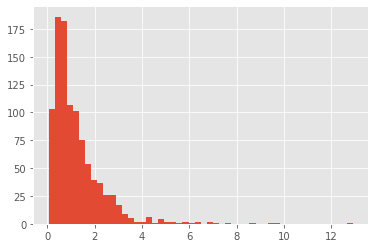

In [117]:
# хотим выборку из 1000 штук
k,m = 5,10
x1 = norm_rv.rvs(size = (k, 1000))
x2 = norm_rv.rvs(size = (m, 1000))

x1 = (x1**2).sum(axis=0)
x2 = (x2**2).sum(axis=0)

y = (x1/k)/(x2/m)

plt.hist(y, bins=50);

Снова внутри `scipy` уже есть готовая реализация $F(k,m)$.

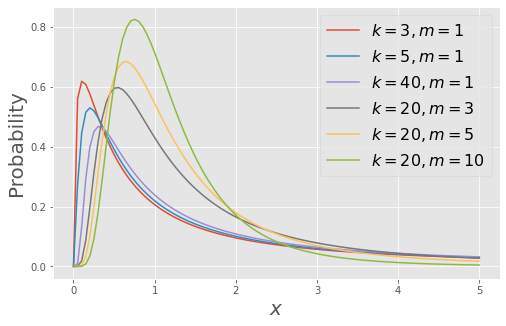

In [118]:
plt.figure(figsize=(8, 5))
x = np.linspace(0,5,100)

par = [(3,1),(5,1),(40,1),(20,3),(20,5),(20,10)]

for k,m in par:
    rv = sts.f(k,m)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$k={},m={}$".format(k,m))
    
plt.xlabel('$x$', fontsize=20)
plt.ylabel(r'Probability', fontsize=20)
plt.legend(fontsize = 16);

__Когда встречается на практике?__  Рано или поздно мы захотим сравнивать дисперсии. Там-то мы и встретимся с распределением Фишера. 

#  2. Закон больших чисел

### Слабая форма ЗБЧ (Пафнутий Львович Чебышёв)

Пусть $X_1, \ldots, X_n$ попарно независимые и одинаково распределённые случайные величины с конечным вторым моментом, $E(X_i^2) < \infty$, тогда имеет место сходимость:

$$
\frac{X_1 + \ldots + X_n}{n} \overset{p}{\to} E(X_1)
$$


__Давайте нарисуем ЗБЧ.__ Мы знаем, что математическое ожидание игральной кости это $3.5$. Сделаем симуляцию: 

* подкинем кость 1 раз, посчитаем среднее число на ней
* подкинем кость 2 раза, посчитаем среднее число на ней

.....

* подкинем кость 100 раз, посчитаем среднее число на ней

Построим картинку для всех этих средних и убедимся в том, что оно и правда сходится к $3.5$.

In [120]:
n_obs = 100

# подкидываем кубик с повторениями много раз
x = np.random.choice(np.arange(1,7), size=n_obs) 
x

array([3, 6, 1, 2, 4, 1, 3, 6, 5, 6, 3, 3, 6, 5, 4, 5, 1, 4, 6, 3, 2, 4,
       1, 5, 1, 4, 2, 2, 2, 5, 2, 4, 4, 1, 4, 6, 4, 3, 5, 2, 5, 4, 3, 5,
       4, 1, 3, 4, 2, 4, 2, 3, 6, 2, 3, 1, 5, 4, 5, 6, 3, 3, 5, 4, 2, 4,
       4, 4, 1, 3, 4, 3, 1, 3, 5, 2, 6, 5, 2, 2, 5, 6, 3, 4, 1, 5, 3, 4,
       5, 2, 1, 6, 4, 5, 2, 6, 3, 1, 2, 2])

In [121]:
# считаем кумулятивную сумму
x_cumsum = np.cumsum(x)
x_cumsum[:5]

array([ 3,  9, 10, 12, 16])

In [122]:
np.arange(1, n_obs + 1)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [123]:
# делим на число наблюдений
x_mean = x_cumsum/np.arange(1, n_obs + 1)
x_mean

array([3.        , 4.5       , 3.33333333, 3.        , 3.2       ,
       2.83333333, 2.85714286, 3.25      , 3.44444444, 3.7       ,
       3.63636364, 3.58333333, 3.76923077, 3.85714286, 3.86666667,
       3.9375    , 3.76470588, 3.77777778, 3.89473684, 3.85      ,
       3.76190476, 3.77272727, 3.65217391, 3.70833333, 3.6       ,
       3.61538462, 3.55555556, 3.5       , 3.44827586, 3.5       ,
       3.4516129 , 3.46875   , 3.48484848, 3.41176471, 3.42857143,
       3.5       , 3.51351351, 3.5       , 3.53846154, 3.5       ,
       3.53658537, 3.54761905, 3.53488372, 3.56818182, 3.57777778,
       3.52173913, 3.5106383 , 3.52083333, 3.48979592, 3.5       ,
       3.47058824, 3.46153846, 3.50943396, 3.48148148, 3.47272727,
       3.42857143, 3.45614035, 3.46551724, 3.49152542, 3.53333333,
       3.52459016, 3.51612903, 3.53968254, 3.546875  , 3.52307692,
       3.53030303, 3.53731343, 3.54411765, 3.50724638, 3.5       ,
       3.50704225, 3.5       , 3.46575342, 3.45945946, 3.48   

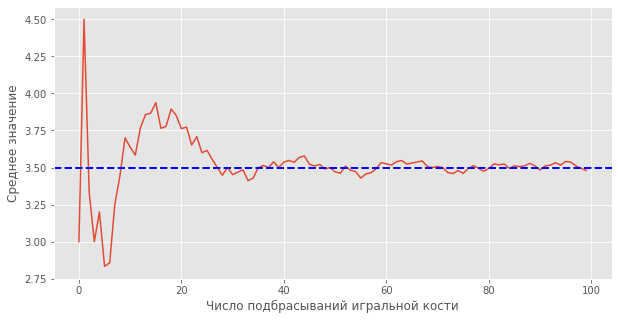

In [124]:
plt.figure(figsize=(10,5))
plt.plot(x_mean)
plt.axhline(3.5, color='b', linestyle='dashed', linewidth=2)
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Среднее значение');

### Сходимость по вероятности

Увидели, что оно сходится? Вопрос только в том как именно. Над стрелкой в ЗБЧ есть буква $p$. 

$$
\frac{X_1 + \ldots + X_n}{n} \overset{p}{\to} E(X_1)
$$

Она означает, что последовательность случайных величин слева сходится к случайной величине справа по вероятности, то есть чем больше $n$ тем ближе вероятность отклонения $\bar x_n$ от $E(X)$ к нулю: 

$$ 
P(\mid \bar x_n - 3.5 \mid \ge \varepsilon) \to 0
$$

Нарисуем её! Возьмём $\varepsilon = 0.01$, нарисуем на нашей картинке из предыдущего упражнения коридор $3.5 \pm \varepsilon$, продолжим ряд до $100000$ подбрасываний и увидим, как постепенно $\bar x_n$ попадает в коридор и всё реже выбивается из него. 

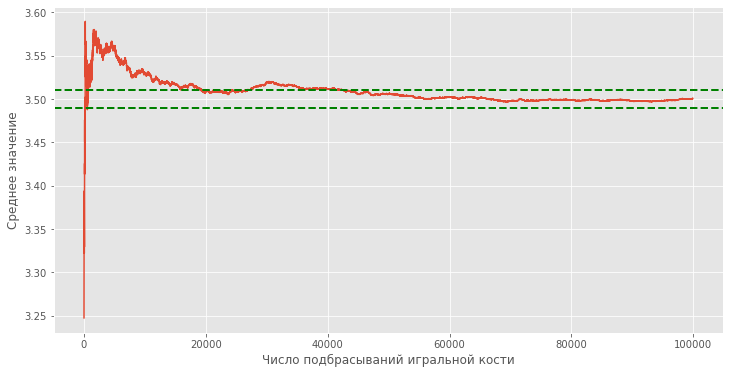

In [125]:
n_obs = 100000

# подкидываем кубик с повторениями много раз
x = np.random.choice(np.arange(1,7), size=n_obs) 
x_cumsum = np.cumsum(x)

x_mean = x_cumsum/np.arange(1, n_obs + 1)

eps = 0.01

plt.figure(figsize=(12,6))
plt.plot(x_mean[100:])
plt.axhline(3.5 + eps, color='g', linestyle='dashed', linewidth=2)
plt.axhline(3.5 - eps, color='g', linestyle='dashed', linewidth=2)

plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Среднее значение');

Можно попробовать оценить вероятность того, что последовательность из средних пробьёт на конкретном шаге установленный нами коридор. Для этого давайте сгенерируем много-много траекторий для игральной кости, как на картинке выше. А после посмотрим как часто на конкретном шаге эти траектории пробивают коридор $3.5 \pm \varepsilon$. Частота таких пробоин будет оценкой вероятности 

$$ 
P(\mid \bar x_n - 3.5 \mid \ge \varepsilon).
$$

In [126]:
n_obs = 10**4

# каждый раз подбрасываем кубик 1000 раз
x = np.random.choice(np.arange(1,7), size=(n_obs, 1000))

# по строкам считаем кумялятивную сумму 
x_cumsum = np.cumsum(x, axis = 0)

# находим средние
x_cumsum = x_cumsum/np.arange(1, n_obs + 1)[:,None]
x_cumsum.shape

(10000, 1000)

In [127]:
x_cumsum

array([[2.        , 1.        , 1.        , ..., 3.        , 1.        ,
        2.        ],
       [2.        , 1.        , 2.5       , ..., 3.5       , 2.5       ,
        4.        ],
       [2.33333333, 2.33333333, 2.66666667, ..., 3.66666667, 2.66666667,
        3.33333333],
       ...,
       [3.52890578, 3.49279856, 3.50960192, ..., 3.48609722, 3.50560112,
        3.47969594],
       [3.52905291, 3.4930493 , 3.50985099, ..., 3.48614861, 3.50535054,
        3.47954795],
       [3.5292    , 3.4929    , 3.51      , ..., 3.486     , 3.5051    ,
        3.4798    ]])

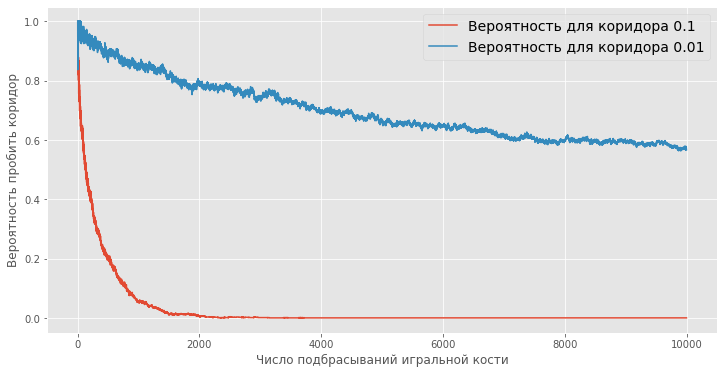

In [128]:
eps1 = 0.1
eps2 = 0.01

# все события, когда пробили коридор 
bad_events_1 = np.abs(x_cumsum - 3.5) > eps1
bad_events_2 = np.abs(x_cumsum - 3.5) > eps2

# вероятность пробоины 
proba_1 = np.mean(bad_events_1, axis=1)
proba_2 = np.mean(bad_events_2, axis=1)

plt.figure(figsize=(12,6))
plt.plot(proba_1, label = f"Вероятность для коридора {eps1}")
plt.plot(proba_2, label = f"Вероятность для коридора {eps2}")
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Вероятность пробить коридор')
plt.legend(fontsize=14);

Как мы видим, вероятность пробить коридор поначалу является высокой, но постепенно убывает. При этом для более узкого коридора вероятность убывает медленнее, что логично :) 

Для нашей ситуации со сходимостью к константе можно построить аналогичные графики для дисперсии среднего. Немного позже мы её вычислим. Окажется, что это 

$$
Var(\bar x_n) = \frac{Var(X_1 + \ldots  + X_n)}{n^2} = \frac{Var(X_1)}{n}.
$$

В знаменателе у нас $n$. По мере роста выборки разброс убывает и среднее сходится к математическому ожиданию. __Важно держать в голове, что дисперсия убывает только при сходимости к константе!__

Давайте посмотрим на то как все три картинки выглядят рядом. На них нарисовано, как среднее $\bar x$, посчитанное по выборке $x_1, \ldots, x_n \sim iid N(2,1),$ сходится по вероятности к $2$. 

<center>
<img src="animation_prob_conv.gif"> 
</center>

### Расходимость  по вероятности


Теперь мы знаем как выглядит сходимость по вероятности. Интересно было бы посмотреть как выглядит её отсутствие.

Распределение Коши тот ещё фрукт. У стандартного распределения Коши такая плотность: 

$$
f_X(x) = \frac{1}{\pi(1+x^2)}
$$

Выглядит красиво. Красота, при этом, приносит нам кучу проблем. Одна из таких проблем - это отсутствие математического ожидания и дисперсии. ЗБЧ говорит нам, что для некоторых распределений 

$$ 
P( \mid \bar x - E(X)\mid \ge \varepsilon  ) \to 0, 
$$

то есть выборочное среднее по вероятности сходится к математическому ожиданию. Интересно было бы узнать к чему будет сходиться выборочное среднее для распределения Коши __(математического ожидания то не существует).__ 

Построим для выборочного среднего распределения Коши картинку, которую мы строили при иллюстрации ЗБЧ чуть выше. 

In [129]:
cauchy_rv = sts.cauchy()  # генератор 

n_obs = 10**4

# 1000 траекторий по n_obs шагов
x = cauchy_rv.rvs(size = (n_obs,1000))
x.shape

(10000, 1000)

In [130]:
# по строкам считаем кумялятивную сумму 
x_cumsum = np.cumsum(x, axis = 0)

# находим средние
x_mean = x_cumsum/np.arange(1, n_obs + 1)[:,None]
x_mean.shape

(10000, 1000)

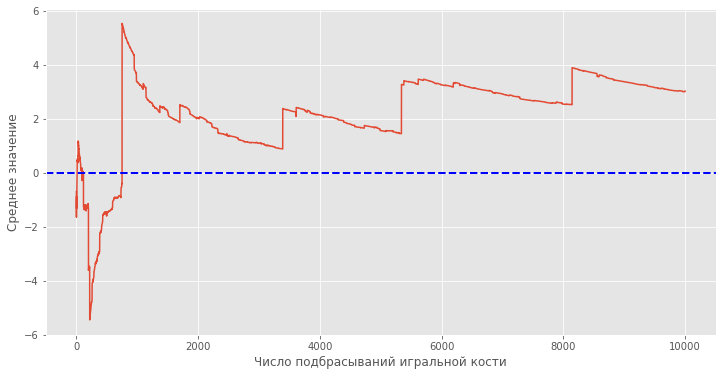

In [132]:
# Нарисуем одну любую траекторию

plt.figure(figsize=(12,6))
plt.plot(x_mean[:,442])
plt.axhline(0, color='b', linestyle='dashed', linewidth=2)
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Среднее значение');

Тут может банально повести и траектория будет визуально выглядеть хорошо. Но что происходит с вероятностями? 

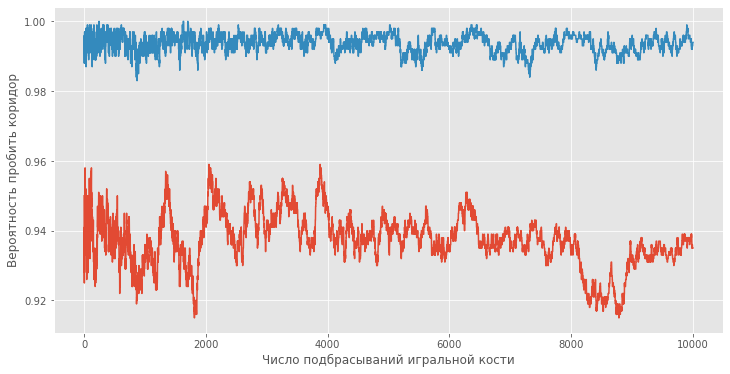

In [133]:
eps1 = 0.1
eps2 = 0.01

# все события, когда пробили коридор 
bad_events_1 = np.abs(x_mean - 0) > eps1
bad_events_2 = np.abs(x_mean - 0) > eps2

# вероятность пробоины 
proba_1 = np.mean(bad_events_1, axis=1)
proba_2 = np.mean(bad_events_2, axis=1)

plt.figure(figsize=(12,6))
plt.plot(proba_1)
plt.plot(proba_2)
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Вероятность пробить коридор');

Никакого движения к нулю. Постоянные пробоины в нашем коридоре. При этом во времени их количество никак не уменьшается. Так выглядит отсутствие сходимости по вероятности. Обратите внимание, что величина пробоины не очень важна. В случае, когда сходимость есть, пробоины также могут быть очень большими, но они происходят всё реже.

Давайте посмотрим на то как все три картинки выглядят рядом. На них изобразим первые $200$ шагов для распределения Коши. Чисто визуально сравните с первыми $200$ шагами для нормального распределения из предыдущего упражнения и ужаснитесь. 

<center>
<img src="animation_prob_unconv.gif"> 
</center>

# 3. Центральная предельная теорема

Пусть $X_1, \ldots, X_n$ случайные величины, имеющие одинаковое распределение с конечными математическим ожиданием и дисперсией. Обычно этот факт записывают вот так:

$$
X_1, \ldots, X_n \sim iid(\mu,\sigma^2)
$$

тогда при $n \to \infty$ имеет место сходимость по распределению: 

$$
\frac{X_1 + \ldots X_n - \mu \cdot n}{ \sigma \sqrt{n}} \overset{d}{\to} N(0,1)
$$


__Простым языком:__ 

* При определённых условиях сумма достаточно большого числа случайных величин имеет распределение близкое к нормальному 
* __Главное,__ чтобы случайные величины были похожи и не было такого, что одна резко выделяется на фоне остальных 


### Упражнение (ЦПТ для равномерного) 

Пусть $X \sim U[-1;1]$, пусть $Y = X_1 + \ldots + X_n$ 

* Нарисуем гистограмму для $X_1$, $X_1 + X_2$,  $X_1 + X_2 + X_3$ и $X_1 + X_2 + X_3 + X_4$.
* На последней картинке нарисуем плотность распределения $N(0,1)$ и визуально сравним, насколько сильно оно отличается от гистограммы. 

In [170]:
n_obs = 10**6

# обратите внимание, что в этой функции задается левая граница и длина
# а не левая и правая границы
uniform_rv = sts.uniform(-1, 2)

In [171]:
x_1 = uniform_rv.rvs(n_obs)
x_2 = uniform_rv.rvs(n_obs)
x_3 = uniform_rv.rvs(n_obs)
x_4 = uniform_rv.rvs(n_obs)

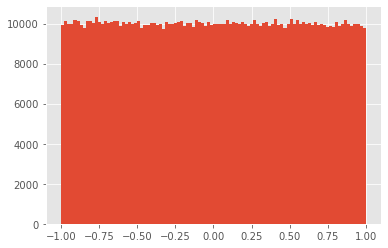

In [172]:
plt.hist(x_1, bins=100); # равномерное распределение

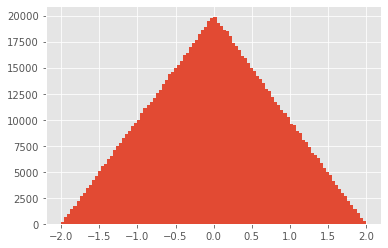

In [173]:
plt.hist(x_1 + x_2, bins=100); # треугольное распределение

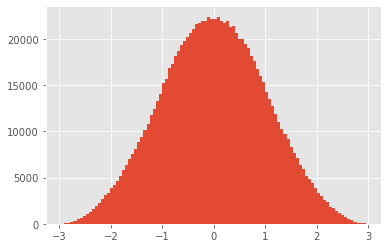

In [174]:
plt.hist(x_1 + x_2 + x_3, bins=100); # уже прослеживается купол

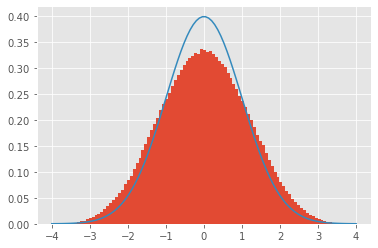

In [175]:
plt.hist(x_1 + x_2 + x_3 + x_4, bins=100, density=True); # ещё куполообразнее

# пририсуем нормальное распределение
x = np.linspace(-4, 4, 100)
pdf = sts.norm().pdf(x)
plt.plot(x, pdf);

На практике ЦПТ говорит нам, что при больших значениях $n$ мы можем заменять распределение средних нормальным и не особо сильно при этом ошибаться. 

Возникает вопрос: __А что такое большие значения n? Когда наступает асимптотика?__ Для разных распределений  и природных явлений она наступает по-разному. Для равномерного уже для четырёх слагаемых распределение довольно сильно напоминает $N(0,1)$.
 
Вот так равномерное распределение будет вести себя дальше: 

<center>
<img src="animation_CPT_1.gif" width="500"> 
</center>

А вот пример для хи-квадрат с одной степенью свободы: 

<center>
<img src="animation_CPT_2.gif" width="500"> 
</center>

Из довольно медленно сходящихся к нормальному распределений, наверное, можно выделить логнормальное распределение.

In [182]:
Sx = x_1 + x_2 + x_3 + x_4
np.random.choice(Sx, size = 1000).mean()

-0.027178583847918433

### Сходимость по распределению

В ЦПТ над мы написали над стрелкой букву $d$. Она означает, что последовательность случайных величин сходится по распределению. 

__Определение:__ говорят, что последовательность случайных величин $X_1, X_2, \ldots$ сходится к случайной величине $X$ _по распределению,_ если $F_{X_n}(x) \to F_X(x)$ для всех $x$, в которых $F_X(x)$ непрерывна. Если функции сходятся, она есть. Если не сходятся, её нет.  

__Пример:__ распредеелние Стьюдента при большом $n$ (число степеней свободы) становится похоже на нормальное, то есть $t(n) \overset{d}{\to}  N(0,1)$.

Давайте это продемонстрируем: 

* Построим на картинке линию: плотность для $N(0,1)$.
* Построим пять пунктирных разноцветных линий: $t(1)$, $t(2)$, $t(5)$, $t(10)$, $t(50)$.
* Сделаем то же самое для функций распределения

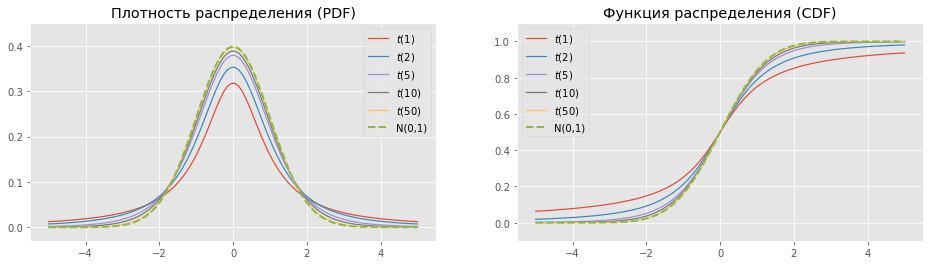

In [140]:
x = np.linspace(-5,5,100)

fig, ax = plt.subplots(1,2,figsize=(16, 4))

for k in [1, 2, 5, 10, 50]:    
    rv = sts.t(df=k)
    pdf = rv.pdf(x)
    cdf = rv.cdf(x) 
    ax[0].plot(x, pdf, label="$t(%s)$" % k, lw=1.2)
    ax[1].plot(x, cdf, label="$t(%s)$" % k, lw=1.2)


rv_limit = sts.norm( )
pdf_limit = rv_limit.pdf(x)
cdf_limit = rv_limit.cdf(x)

ax[0].plot(x, pdf_limit, label='N(0,1)', linestyle='dashed', lw=2)
ax[0].set_ylim(-0.03,0.45)
ax[0].set_title("Плотность распределения (PDF)")
ax[0].legend() 

ax[1].set_ylim(-0.1,1.1)
ax[1].plot(x, cdf_limit, label='N(0,1)', linestyle='dashed', lw=2)
ax[1].set_title("Функция распределения (CDF)")
ax[1].legend();

Конечно же держите гифку. Как же без неё: 

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/animation_convdist_student.gif" width="1500"> 
</center>

# 3. Симуляции и примеры

### Квантильное преобразование

#### Теорема:

Пусть функция распределения $F_X(x)$ непрерывна. Тогда случайная величина $Y = F(X)$ имеет равномерное распределение на отрезке $[0; 1]$.


#### Следствие:

Пусть $Y \sim U[0;1]$, а $F(x)$ произвольная функция распределения. Тогда случайная величина $X = F^{-1}(Y)$ будет иметь функцию распределения $F(x)$.


#### Что это нам даёт:


- Позволяет генерировать из равномерного распределения другие 

- Применимо невсегда, напрмер, для нормального распределения используют другие алгоритмы 

<center>
<img src="quant.png" height="200"> 
</center>

Генерация случайностей это довольно сложное занятие. Равномерная случайная величина одна из самых приятных в плане генерации. Обычно алгоритмы генерации создают именно для неё, так как с более сложными распределениями возникают проблемы.  Квантильное преобразование позволяет нам расширить навыки компьютера и переработать равномерную случайную величину в необходимое нам распределение.

## Упражнение

Сварить из равномерной случайной величины $U[0; 1]$  экспоненциальную величину, $Exp(\alpha)$.

__Решение:__

Из теории вероятностей мы знаем, что у экспоненциальной случайной величины функция распределения выглядит так: 

$$
F_X(x) = 1 - e^{-\alpha x}.
$$

Найдём обратную функцию:

$$
F_X^{-1}(y) = -\frac{1}{\alpha} \ln(1-y). 
$$

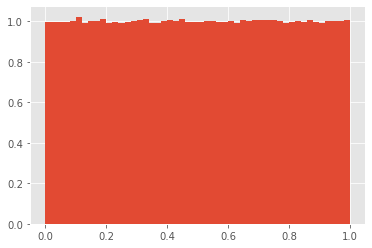

In [142]:
uniform_rv = sts.uniform(0, 1)

n_obs = 10**6
y = uniform_rv.rvs(n_obs)
plt.hist(y, density = True, bins = 50);

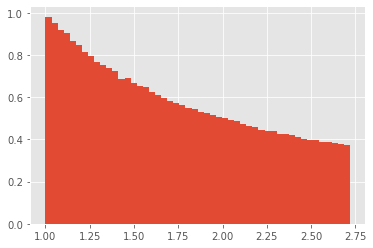

In [143]:
x = np.exp(y)
plt.hist(x, density = True, bins = 50);

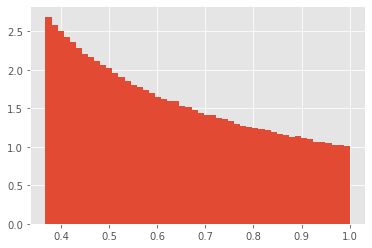

In [144]:
x = np.exp(-y)
plt.hist(x, density = True, bins = 50);

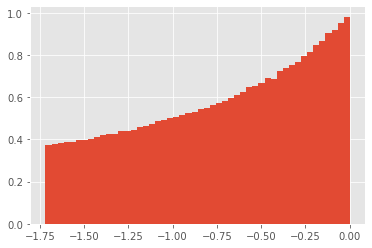

In [145]:
x = 1 - np.exp(y)
plt.hist(x, density = True, bins = 50);

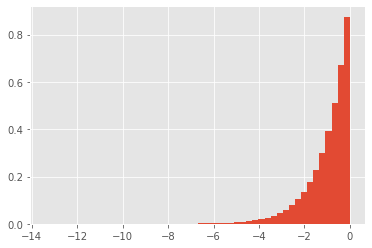

In [146]:
x = np.log(y)
plt.hist(x, density = True, bins = 50);

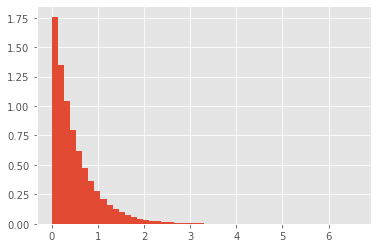

In [147]:
x = -0.5*np.log(1 - y)
plt.hist(x, density = True, bins = 50);

In [148]:
np.mean(x)

0.5000440752131818

Теперь попробуем в обратную сторону. 

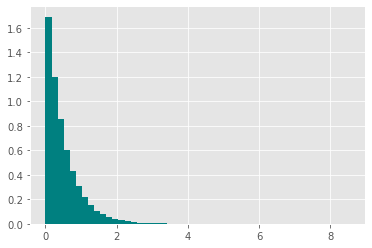

In [149]:
exponential_rv = sts.expon(scale = 0.5)

n_obs = 10**6
x = exponential_rv.rvs(n_obs)
plt.hist(x, density = True, bins = 50, color = 'teal');

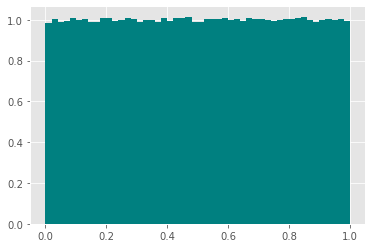

In [150]:
y = 1 - np.exp(-2*x)

plt.hist(y, density = True, bins = 50, color = 'teal');

Lambda value used for Transformation: 0.2658200173733192


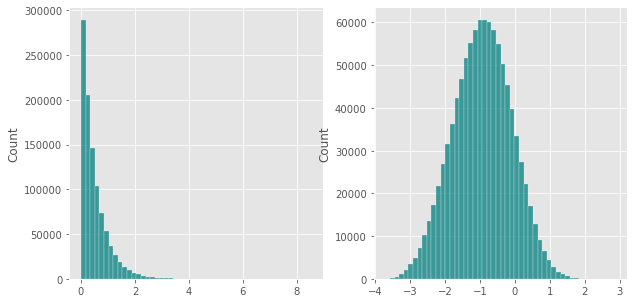

In [151]:
fitted_data, fitted_lambda = sts.boxcox(x)
  
fig, ax=plt.subplots(1,2)
sns.histplot(x, ax=ax[0], bins = 50, color = 'teal')
sns.histplot(fitted_data, ax=ax[1], bins = 50, color = 'teal')
fig.set_figheight(5)
fig.set_figwidth(10)
print(f"Lambda value used for Transformation: {fitted_lambda}")

## Упражнение

Давайте попробуем получить случайную величину со следующей функцией распределения: 

$$
F(x) = \begin{cases} 0, x < 0 \\ x^7, x \in [0,1] \\ 1, x > 1 \end{cases}
$$

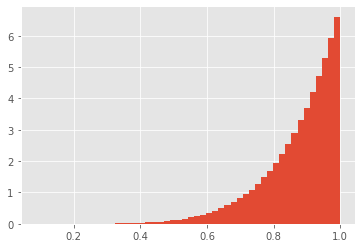

In [155]:
uniform_rv = sts.uniform(0, 1)

n_obs = 10**6
y = uniform_rv.rvs(n_obs)

x = y**(1/7)
plt.hist(x, density = True, bins = 50);

Работать такая схема будет не всегда. Например, её никогда не используют для нормального распределения. Проблема в том, что подсчет обратной функции распределения для него аналитически невозможен, так как интеграл 


$$ 
F(x) = \int_{-\infty}^{x} \frac{1}{\sigma \sqrt{2 \pi}} \cdot e^{-\frac{(t-\mu)^2}{2 \sigma^2}} dt
$$

не берётся. Немного подробнее про разные генераторы случайных чисел можно [почитать на хабре.](https://habrahabr.ru/post/263993/)

###  Что разрешает ЗБЧ

ЗБЧ разрешает нам решать реальные проблемы с помощью симуляций. Например, можно оценить математическое ожидание случайной величины $\frac{1}{X}$, где $X \sim N(5; 3)$ без взятия интегралов.

0.21647388959874764

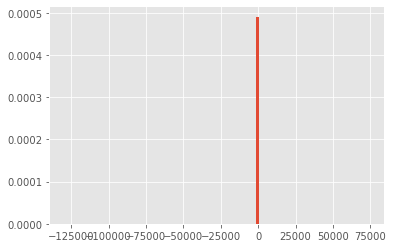

In [157]:
n_obs = 10**6

norm_rv = sts.norm(loc=5, scale=3)  
x = norm_rv.rvs(n_obs)


plt.hist( 1/x, density = True, bins = 100);

np.mean(1/x)

Если бы не было питона пришлось бы искать такой интеграл: 

$$
\mathbb{E} \left(\frac{1}{X} \right) = \int_{-\infty}^{+\infty} \frac{1}{x} \cdot \frac{1}{\sigma \sqrt{2 \pi}} \cdot  e^{-\frac{(x - 5)^2}{2 \cdot 3^2}} dx.
$$

> __Важно:__ в видео мы с вами сказали, что для данного примера подход с симуляциями не работает. Интеграл расходится, так как этого математического ожидания не существует. При перезапуске симуляций мы каждый раз будем получать в качестве стреднего новые числа. Если мы попробуем нарисовать в динамике, к чему сходится выборочное среднее, мы увидим, что никакой сходимости тут нет. С делением случайных величин надо быть очень осторожным. 

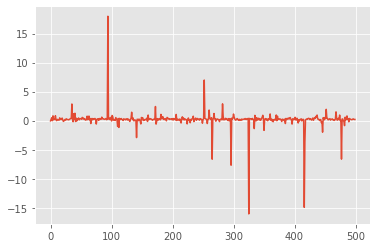

In [89]:
n_obs = 10**4

means = []
for i in range(500):
    x = norm_rv.rvs(n_obs)
    means.append( np.mean(1/x) )
plt.plot(means);

__Другой пример.__ Также легко оценить многие вероятности. Например, оценим вероятность $P(X_1 + X_2 + X_3^2 > 5)$, где величины $X_i$ независимы и одинаково равномерно распределены $X_i \sim U[0;2]$:

In [158]:
n_obs = 10**6

# обратите внимание, что в этой функции задается левая граница и длина
# а не левая и правая границы
uniform_rv = sts.uniform(0, 2)

x_1 = uniform_rv.rvs(n_obs)
x_2 = uniform_rv.rvs(n_obs)
x_3 = uniform_rv.rvs(n_obs)

success = x_1 + x_2 + x_3**2 > 5
success[:5]

array([False,  True, False, False, False])

In [16]:
np.sum(success) / n_obs

0.147709

Здесь вектор success будет содержать значение `True` там, где условие `x_1 + x_2 + x_3**2 > 5` выполнено, и `False` там, где условие не выполнено. При сложении командой `np.sum()` каждое `True` будет посчитано как единица, а каждое `False` как ноль. Поэтому `np.sum(success)` даст количество раз, когда условие `x_1 + x_2 + x_3**2 > 5` выполнено.

__Как найти такую вероятность руками:__ 

- Первым шагом нам придётся найти распределение для $X_3^2$ 
- Втором шагом по формуле свёртки надо будет найти распределение суммы
- Третьим шагом можно посчитать вероятность

Почти на каждом шаге мы сталкиваемся с интегрированием. 

__Ещё пример.__ давайте найдём условную вероятность $P(X_1 + X_2 + X_3 > 0.8 \mid X_3 < 0.1)$. Снова используем для этого всю мощь `numpy` и сделаем срез по всем объектам, попавшим под условие.

In [159]:
n_obs = 10**6

uniform_rv = sts.uniform(0, 2)

x_1 = uniform_rv.rvs(n_obs)
x_2 = uniform_rv.rvs(n_obs)
x_3 = uniform_rv.rvs(n_obs)

uslovie = x_3 < 0.1

# x[uslovie] оставит в векторе только те элементы, где uslovie == True
success = x_1[uslovie] + x_2[uslovie] + x_3[uslovie] > 0.8
np.sum(success) / np.sum(uslovie)

0.931000719366957

In [18]:
# можно посмотреть сколько раз за всю симуляцию x_3 < 0.1
np.sum(uslovie)

50282

__Как найти такую вероятность руками:__ 

- Первым шагом по формуле свёртки надо будет найти распределение суммы
- Вторым шагом нам надо будет найти условную плотность 
- Третьим шагом можно посчитать вероятность

__Тем не менее это не говорит про ненужность аналитической работы.__ 

- Постоянно делать симуляции вместо того, чтобы один раз получить формулу и считать по ней - неэффективно 
- Часто возникают ситуации, когда за счёт генераций получить правильный ответ очень сложно. Например, куча проблем возникает для многомерных распределений.

> Подобные численные методы для оценки разных характеристик называются методами Монте-Карло.

### Удав и багеты

Удав Анатолий любит французские багеты. Длина французского багета равна $1$ метру. За один укус Удав Анатолий поедает кусок случайной длины, равномерно распределённый на отрезке $[0;1]$. Для того, чтобы съесть весь багет удаву потребуется случайное количество $N$ укусов. 

Найдём $\mathbb{E}(N)$ и $Var(N)$ с помощью симуляций.

In [160]:
# Багеты! Давайте начнём с одной итерации эксперемента.
unif_rv = sts.uniform(0, 1)

l = 1 # длина багета
m = 0 # число укусов

# пока длина багета больше 0
while l > 0:
    # делай укусы
    l -= unif_rv.rvs(1)
    m += 1 # на один укус стало больше

print(m)

2


Одну итерацию можно обернуть в функцию, чтобы было удобнее пользоваться. 

In [33]:
def eat_one_baguette():
    l = 1
    m = 0 
    while l > 0:
        l -= unif_rv.rvs(1)
        m += 1

    return(m)

eat_one_baguette()

3

Теперь мы можем провести много итераций эксперимента.

In [34]:
n_obs = 10**4 # количество итераций эксперимента
N = [eat_one_baguette() for i in range(n_obs)]

In [35]:
np.mean(N)

2.7107

In [36]:
np.var(N)

0.7540055099999999

Кстати говоря, в сборнике сложных задач по теории вероятностей, [культурном коде,](https://github.com/bdemeshev/probability_dna/raw/master/probability_dna.pdf) можно найти три разных решения этой задаи руками. Она там находится под номером $46$. Кроме неё там много других очень красивых задач. 

# 4. Домашнее задание

### Упражнение 1 (распределение Пуассона)

Случайная величина $X$ имеет распределение Пуассона с $\lambda = 2$,  $X \sim Pois(2)$. С помощью $10^6$ симуляций оцените: 

* $P(X > 6)$
* $P(X > 6 \mid X > 5)$
* $P(X > 5, X < 7)$
* $E(X^3)$ 
* $E(X \mid X > 5)$

### Упражнение 2 (нейросети)

Юра завёл себе две нейронные сетки и два сервера для их обучения. Две нейросети обучаются независимо на двух серверах. Время их обучения $T_1$ и $T_2$ равномерно распределено на отрезке $[1;3]$ (обучение измеряется в часах). В процессе обучения сервер может упасть. Момент падения сервера $T$ распределён экспоненциально с параметром $\lambda = 0.3$. Он не зависит от времени обучения нейросеток. 

Известно, что одна из нейросетей успела обучиться, а вторая не успела. Какова вероятность того, что $T \le 1.5$? При симуляциях для генерации момента подения используйте для обоих серверов одну и ту же случайную величину. 

**Hint:** при решении задачи помните о том, что у вас две нейросетки!

### Упражнение 3 (квантильное преобразование)

Случайная величина $X$ описывается функцией распределения: 

$$
F(x) = \left( \frac{\ln x}{\ln \theta} \right)^{\alpha},  \quad x \in [1; \theta]
$$

Сгенерируйте из такого распределения выборку объёма $10^6$ и оцените математическое ожидание данной случайной величины. В качестве параметров возьмите $\alpha=2, \theta = 10$.